This is the test for pca and large_tsne method. It tests with a larger dataset. 
The large dataset is in the folder large_test, which is the sc-Seq data from lab5.
The first output a valid pca result plot. We will also provide code to run large_tsne, but it will take very long time so it is not recommended.

First import CSE185_tSNE

In [1]:
from CSE185_tSNE import *

Then, run the standard scanpy pipeline code 

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import os

sc.settings.verbosity = 3            
sc.settings.set_figure_params(dpi=80, facecolor='white')

import matplotlib.pyplot as plt
import scipy
import math                        
from scipy.special import logsumexp


ds = "GSM5114461_S6_A11"
adata = sc.read_10x_mtx(path="./large_test",prefix=ds+"_", cache=True)
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
adata.var['mt'] = adata.var_names.str.startswith('MT-')  
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.scale(adata, max_value=10)

... reading from cache file cache/large_test-GSM5114461_S6_A11_matrix.h5ad
filtered out 198 cells that have less than 200 genes expressed
filtered out 4965 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


/opt/conda/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Then obtain the count matrix adata.X. 
You can use 
```
pca.run_pca
```
and it will output the pca plot.

In [3]:
X = pd.DataFrame(adata.X)
X2  = pca.run_pca(X)
v = X2.astype(np.float32)
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.leiden(adata)
sc.tl.umap(adata)

minus!
dot!
eig!
dot!
computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50


/tmp/ipykernel_672/3727993578.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  v = X2.astype(np.float32)


    finished (0:00:04)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:11)
running Leiden clustering
    finished: found 11 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


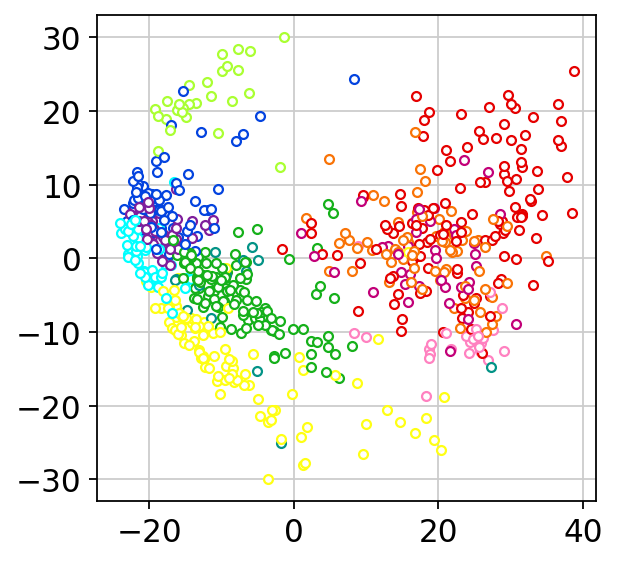

In [4]:
c = adata.obs.leiden
Color = [ 'xkcd:red',    'xkcd:green',  'xkcd:yellow',  'xkcd:blue',
          'xkcd:orange', 'xkcd:purple', 'xkcd:cyan',    'xkcd:magenta',
          'xkcd:lime',   'xkcd:pink',   'xkcd:teal',    'xkcd:lavender',
          'xkcd:brown',  'xkcd:maroon', 'xkcd:olive',   'xkcd:navy' ]
for i in range(X.shape[0]):
    plt.plot(v[i,0], v[i,1], 'o', markersize=4, mfc='w',mec=Color[int(c[i])])
plt.show()

Then, you should run large_tsne function:

begin calc P
begin calc D
after calc D
begin calc sigma
after calc sigma
begin cal pji
after cal pji
after calc P
True
0


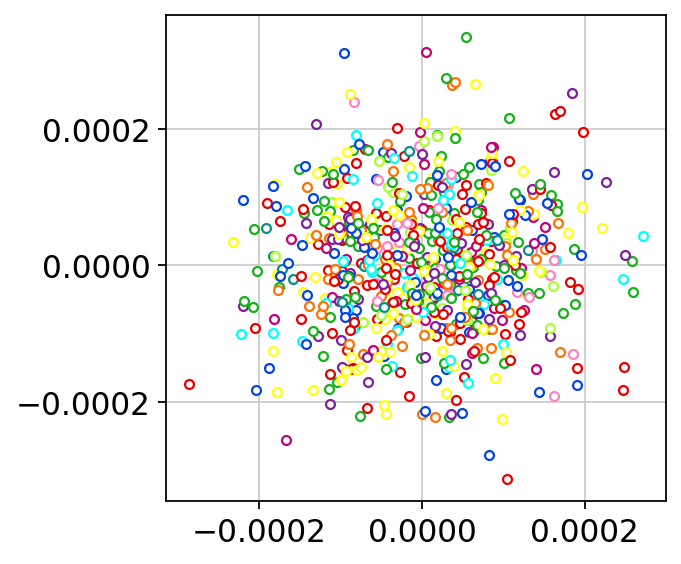

83.89510917663574


In [5]:
import time
t0 = time.time()
tSNE.large_tsne(v,c)
t1=time.time()
print(t1-t0)

This will either take very long time, or not able to gradient descent using scipy optimizer! The optimizer is in deep trouble at higher dimensions.
So we basically cannot provide good result!
Let's compare it with sklearn tSNE.

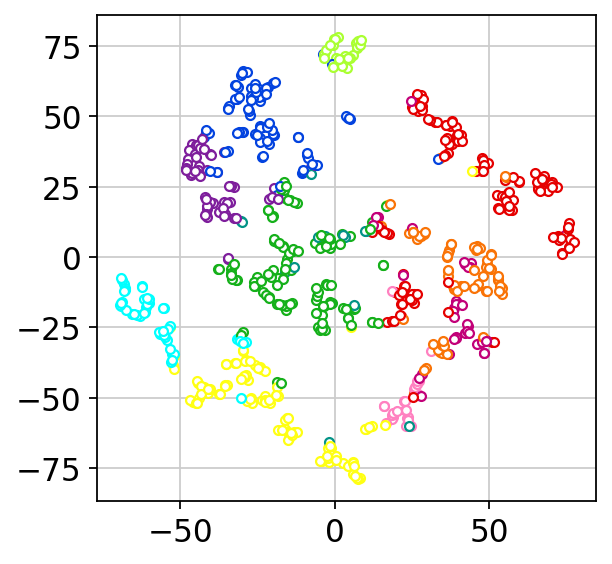

2.566476821899414


In [6]:
from sklearn.manifold import TSNE

t2=time.time()
Y = TSNE(perplexity=5).fit_transform(v) 
for i in range(Y.shape[0]):
    plt.plot(Y[i,0], Y[i,1], 'o', markersize=4, mfc='w',mec=Color[int(c[i])])
plt.show()
t3=time.time()
print(t3-t2)

You can see this significant difference! Our own tSNE version is not doing a good job at large dataset